# Objective

The overall aim of this notebook is to explore the performance of the multi-step reconstruction when a dirty image and a psf is passed for the low frequencies, as opposed to a low resolution reconstruction.

Specifically, we will look to solve:
$$\arg\min_{\alpha} \|G_\mathcal{L}(\tilde{\imath}_\mathcal{L} - H_\mathcal{L} W \alpha)) \|_2^2 + \|G_\mathcal{H}(\tilde{\imath}_\mathcal{H} - H_\mathcal{H} W \alpha) \|_2^2 + \lambda \|\alpha\|_1$$
rather than:
$$\arg\min_{\alpha} \| G_\mathcal{L} (\hat{\imath}_\mathcal{L} - W\alpha)\|_2^2 + \|G_\mathcal{H}( \tilde{i}_\mathcal{H} - H_\mathcal{H} W \alpha) \|_2^2 + \lambda \|\alpha\|_1$$

This is equivalent to performing distributed de/gridding, gathering the dirty images in one central location, and reconstructing with all baselines.

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers
from scipy import signal
import pandas as pd
import os

plt.set_loglevel("critical")
cmap='turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]

wavelet_type_dict = {"daubechies" : 0, "iuwt" : 1}

wavelet_type = "daubechies"
wavelet_type_idx = wavelet_type_dict[wavelet_type]

cuts = [20, 35, 55]
actual_names = ["SGRA", "SGRB", "SGRC"]
linestyles = ["-", "--", ":"]
colours = ['r', 'g', 'b']
colours2 = ['c', 'm', 'y', 'crimson', 'darkgoldenrod', 'olivedrab']
labels = ["Sgr A", "Sgr B2", "Sgr C"]
fista_iter = 1000

## Single major loop reconstruction for all datasets

Solving for: $$\arg\min_{\alpha} \|G_\mathcal{L}(\tilde{i}_\mathcal{L} - H_\mathcal{L} W \alpha)) \|_2^2 + \|G_\mathcal{H}(\tilde{i}_\mathcal{H} - H_\mathcal{H} W \alpha) \|_2^2 + \lambda \|\alpha\|_1$$

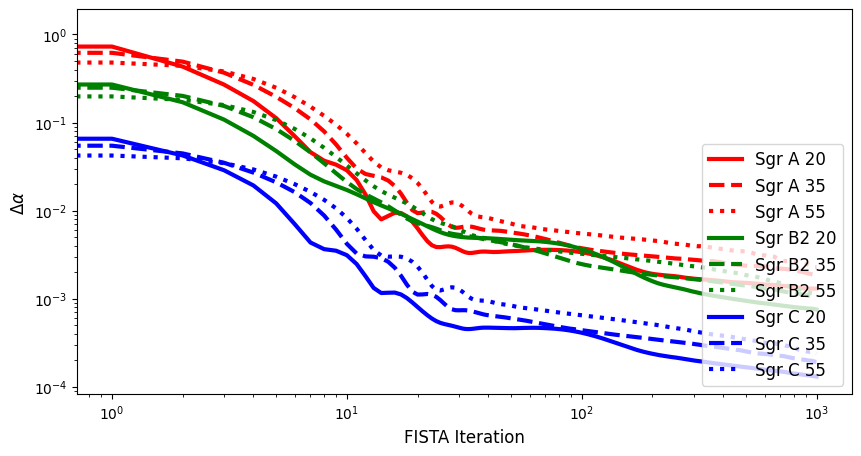

In [2]:
for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"
        difalpha = helpers.read_csv(csv_name)
        difalpha = difalpha[1:]
        difalpha = [float(x) for x in difalpha]
        plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

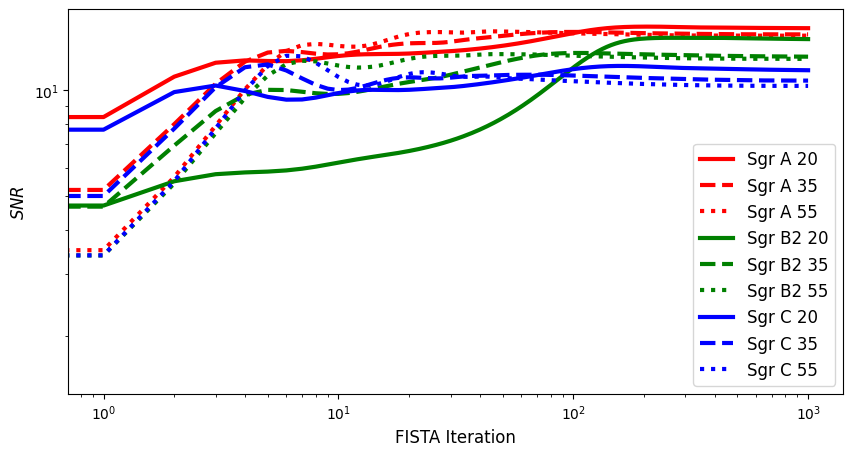

In [3]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step/" + dataset + "_high_" + str(cut - 5) + ".csv"
        snr = helpers.read_csv(csv_name)
        snr = snr[1:]
        snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
        plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.xscale('log')
plt.yscale('log')

plt.legend(loc="lower right", fontsize=12)

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

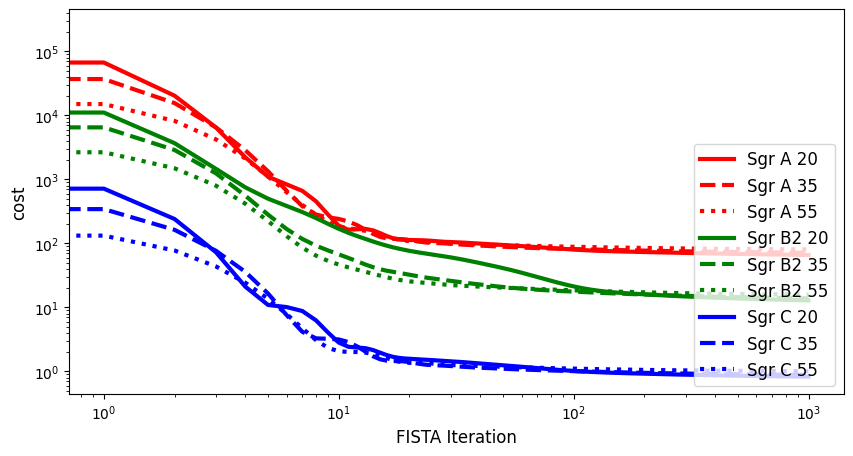

In [4]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"
        costs = helpers.read_csv(csv_name)
        costs = costs[1:]
        costs = [float(x) for x in costs]
        plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("cost", fontsize=12)
plt.show()

## Single major loop multi-step reconstruction

Solving for:
$$\arg\min_{\alpha} \| G_\mathcal{L} (\hat{\imath}_\mathcal{L} - W\alpha)\|_2^2 + \|G_\mathcal{H}( \tilde{\imath}_\mathcal{H} - H_\mathcal{H} W \alpha) \|_2^2 + \lambda \|\alpha\|_1$$

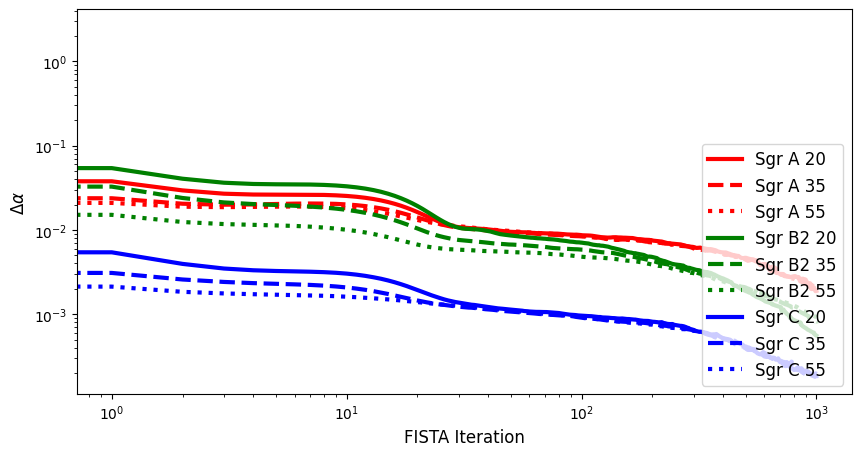

In [5]:
for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/multistep/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"
        difalpha = helpers.read_csv(csv_name)
        difalpha = difalpha[1:]
        difalpha = [float(x) for x in difalpha]
        plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])


plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

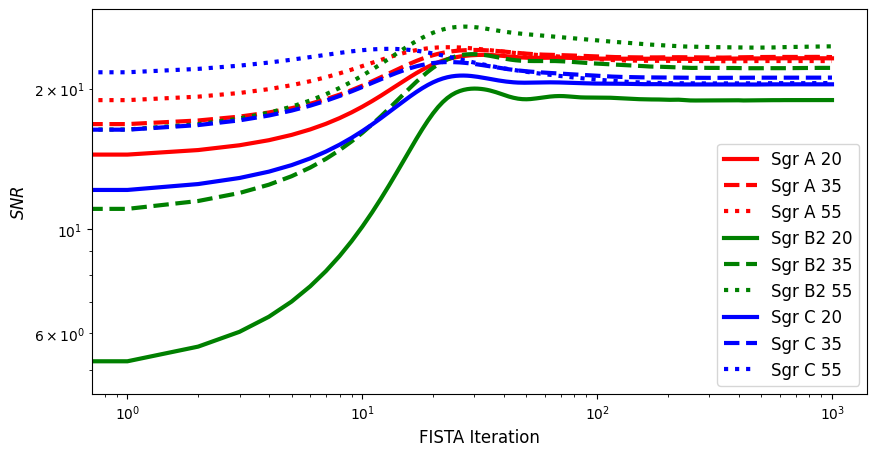

In [6]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/multistep/" + dataset + "_high_" + str(cut - 5) + ".csv"
        snr = helpers.read_csv(csv_name)
        snr = snr[1:]
        snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
        plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

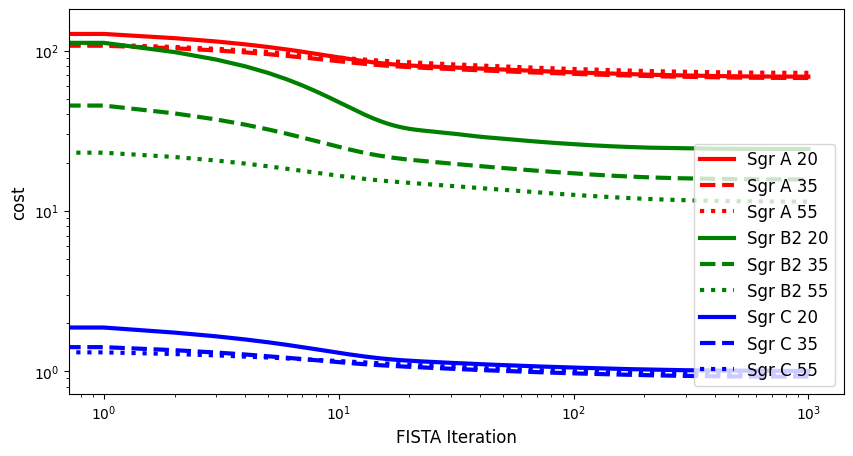

In [7]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/multistep/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"
        costs = helpers.read_csv(csv_name)
        costs = costs[1:]
        costs = [float(x) for x in costs]
        plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"cost", fontsize=12)
plt.show()

## Single major loop single step all visibilities reconstruction

Solving for:
$$\arg\min_{\alpha} \|\tilde{\imath} - H W \alpha \|_2^2 + \lambda \|\alpha\|_1$$

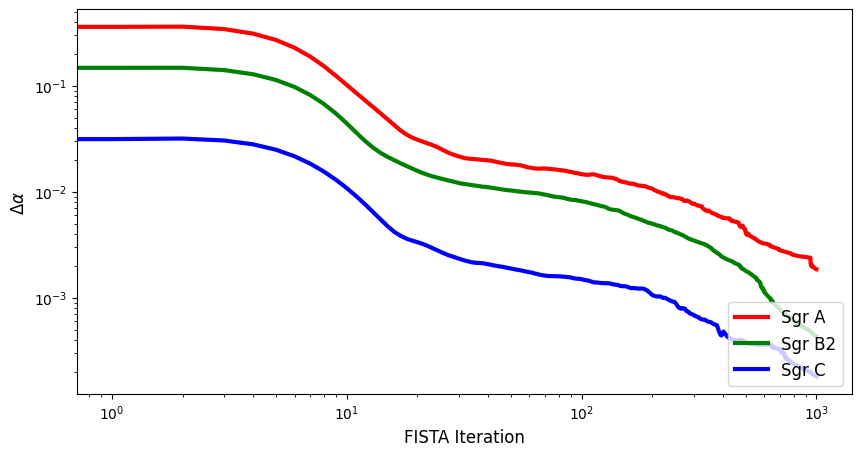

In [8]:
for i, dataset in enumerate(actual_names):
    csv_name = "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_conv_full.csv"
    difalpha = helpers.read_csv(csv_name)
    difalpha = difalpha[1:]
    difalpha = [float(x) for x in difalpha]
    plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i], lw=3)


plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

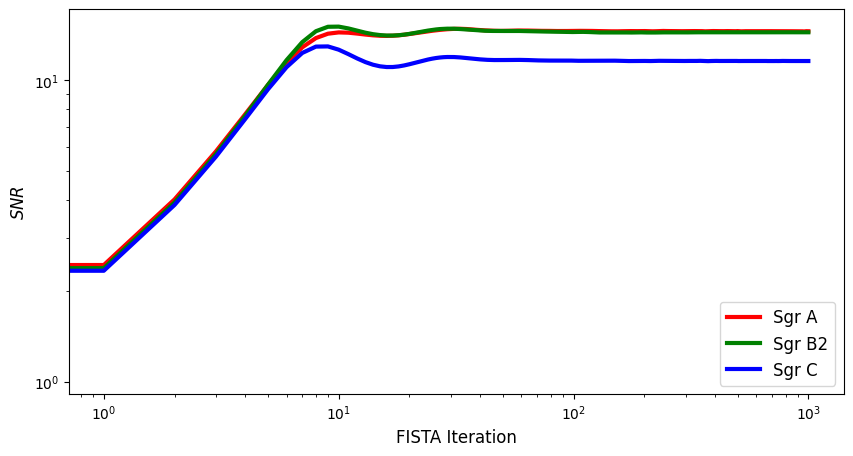

In [9]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    csv_name = "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_full.csv"
    snr = helpers.read_csv(csv_name)
    snr = snr[1:]
    snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
    plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i], lw=3)

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

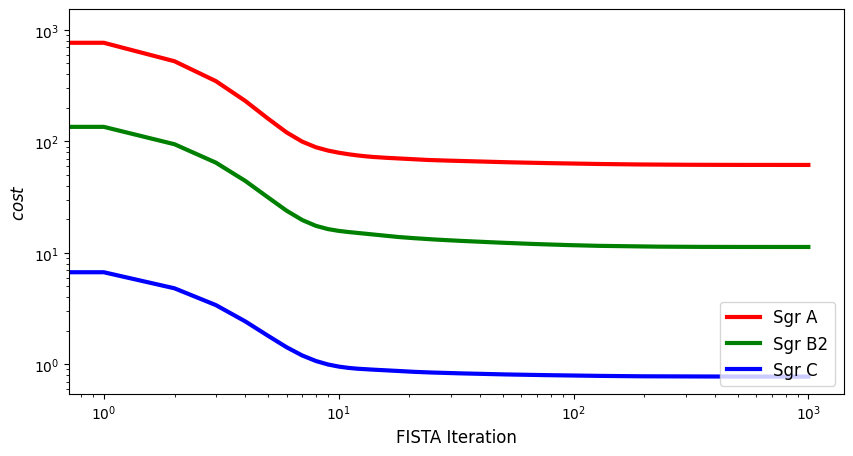

In [10]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    csv_name = "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_cost_full.csv"
    costs = helpers.read_csv(csv_name)
    costs = costs[1:]
    costs = [float(x) for x in costs]
    plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i], lw=3)

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$cost$", fontsize=12)
plt.show()

## What if instead of $\tilde{\imath}_\mathcal{L}$ we instead pass $H_\mathcal{L}\hat{\imath}$, solving for: $$\arg\min_{\alpha} \|G_\mathcal{L}(H_\mathcal{L}\hat{\imath}_\mathcal{L} - H_\mathcal{L} W \alpha)) \|_2^2 + \|G_\mathcal{H}(\tilde{\imath}_\mathcal{H} - H_\mathcal{H} W \alpha) \|_2^2 + \lambda \|\alpha\|_1$$

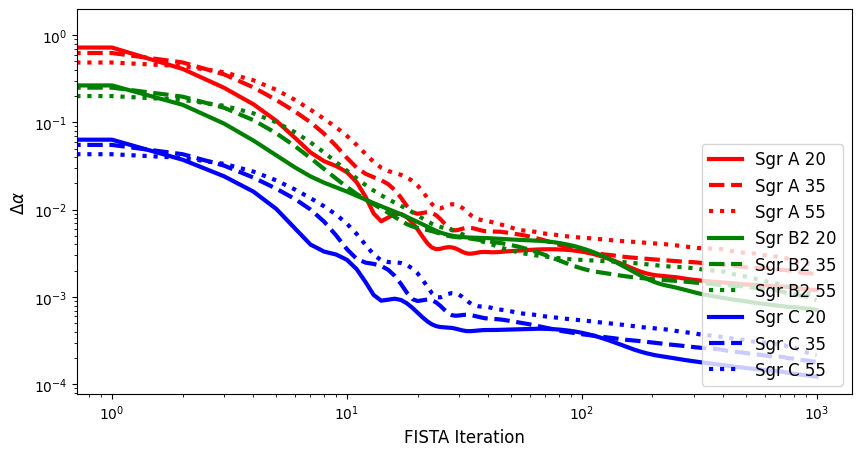

In [11]:
for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_conv/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"
        difalpha = helpers.read_csv(csv_name)
        difalpha = difalpha[1:]
        difalpha = [float(x) for x in difalpha]
        plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])


plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

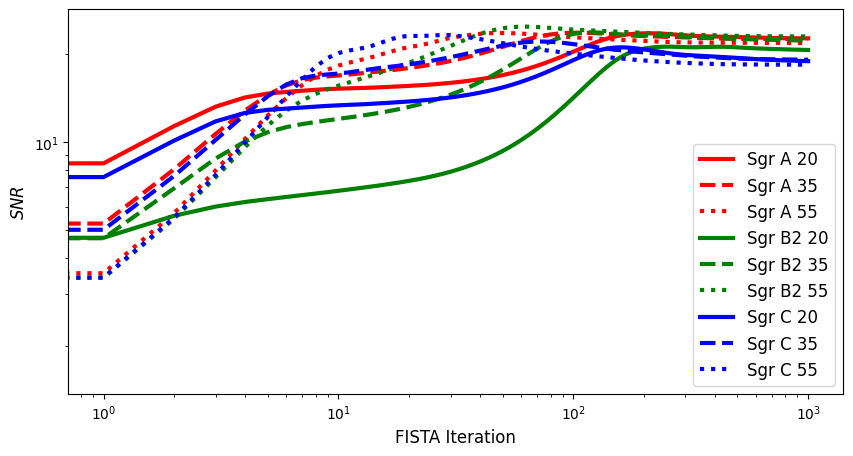

In [12]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_conv/" + dataset + "_high_" + str(cut - 5) + ".csv"
        snr = helpers.read_csv(csv_name)
        snr = snr[1:]
        snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
        plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

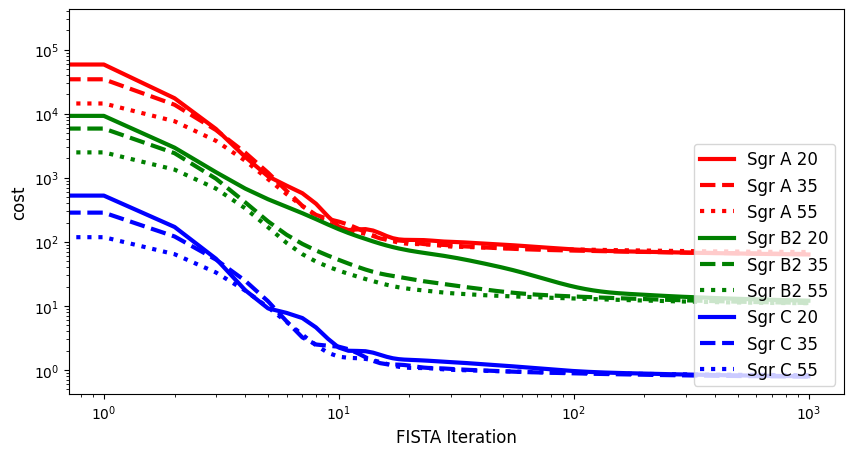

In [13]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_conv/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"
        costs = helpers.read_csv(csv_name)
        costs = costs[1:]
        costs = [float(x) for x in costs]
        plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("cost", fontsize=12)
plt.show()

## Same as above but instead we set $\tilde{\imath}_\mathcal{H} = H_\mathcal{H}i$, ie. we perform the convolution with the PSF ourselves rather than use de/gridding. (Since this is on the ground truth, we don't account for noise, this is just to test)

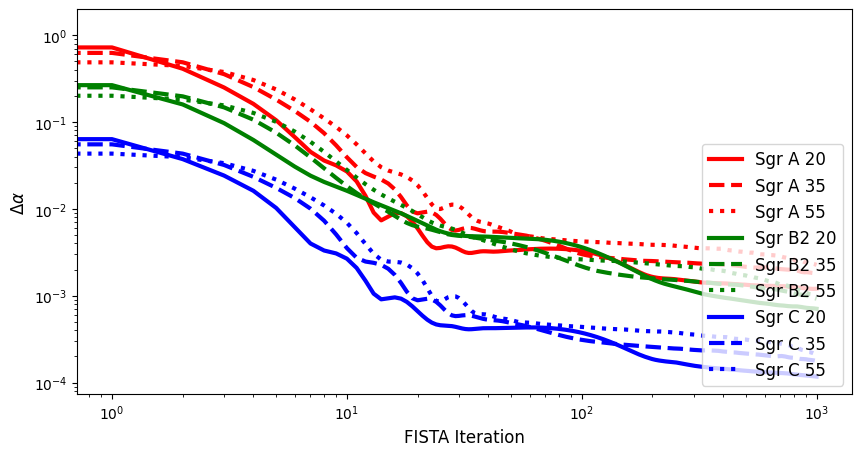

In [14]:
for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"
        difalpha = helpers.read_csv(csv_name)
        difalpha = difalpha[1:]
        difalpha = [float(x) for x in difalpha]
        plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

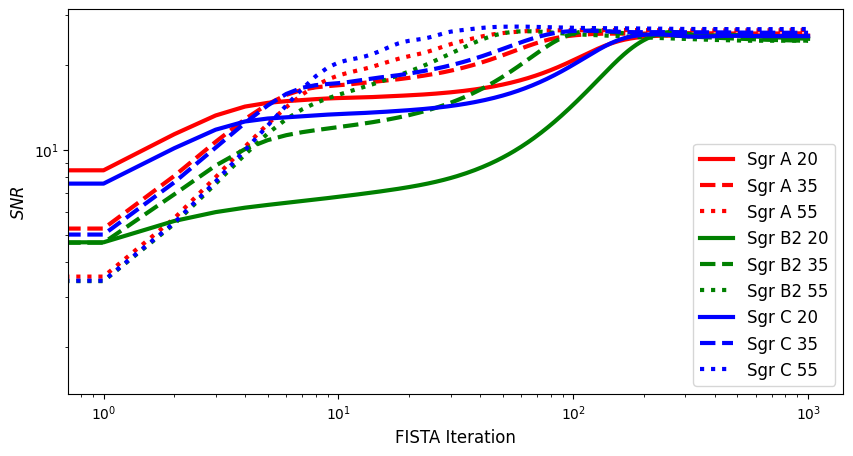

In [15]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_high_" + str(cut - 5) + ".csv"
        snr = helpers.read_csv(csv_name)
        snr = snr[1:]
        snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
        plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

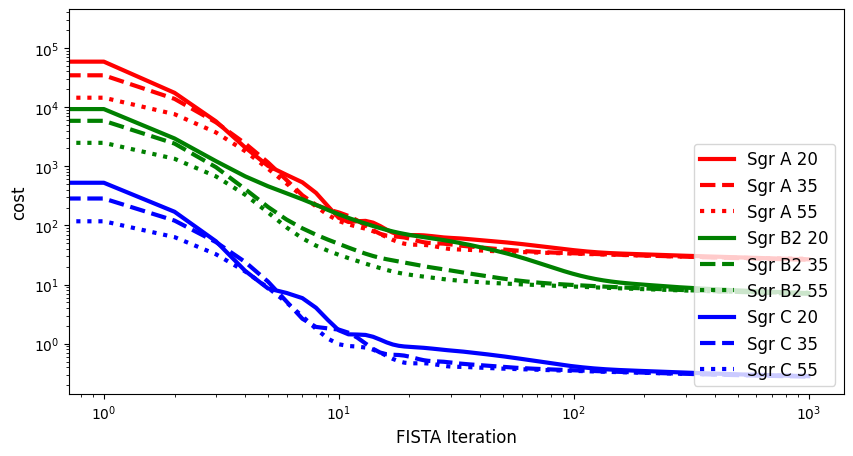

In [16]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"
        costs = helpers.read_csv(csv_name)
        costs = costs[1:]
        costs = [float(x) for x in costs]
        plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("cost", fontsize=12)
plt.show()

## Same as the first case, but instead with noiseless datasets

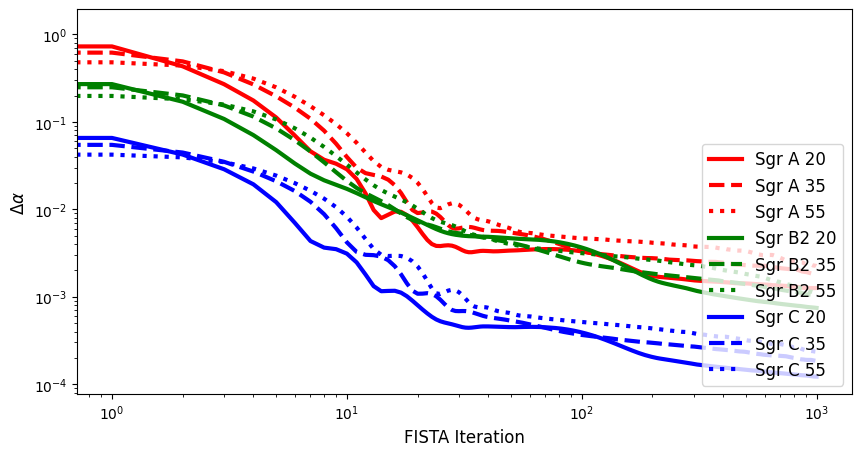

In [17]:
for i, dataset in enumerate(actual_names):
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"
        difalpha = helpers.read_csv(csv_name)
        difalpha = difalpha[1:]
        difalpha = [float(x) for x in difalpha]
        plt.plot(range(0, len(difalpha)), difalpha, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

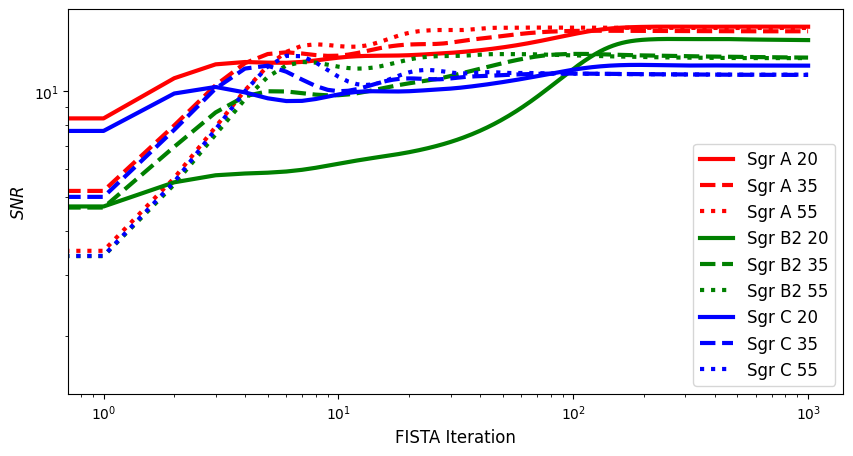

In [18]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_high_" + str(cut - 5) + ".csv"
        snr = helpers.read_csv(csv_name)
        snr = snr[1:]
        snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
        plt.plot(range(0, len(snr)), snr, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$SNR$", fontsize=12)
plt.show()

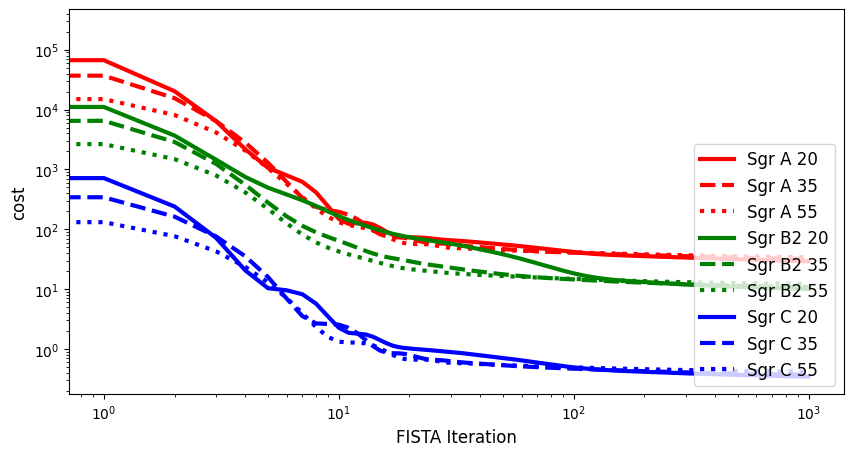

In [19]:
for i, dataset in enumerate(actual_names):
    gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")
    for j, cut in enumerate(cuts):
        csv_name = "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"
        costs = helpers.read_csv(csv_name)
        costs = costs[1:]
        costs = [float(x) for x in costs]
        plt.plot(range(0, len(costs)), costs, c=colours[i], label=labels[i] + " " + str(cut), lw=3, linestyle=linestyles[j])

plt.legend(loc="lower right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("cost", fontsize=12)
plt.show()

## Comparison of FISTA convergence across different strategies

In [20]:
dataset = "SGRA"
cut = 20

conv_csv_names = ["../results/dirty_as_constraint/single_step/" + dataset + "_conv_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_conv_full.csv",
    "../results/dirty_as_constraint/multistep/" + dataset + "_conv_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_conv/" + dataset + "_conv_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_conv_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_conv_high_" + str(cut - 5) + ".csv"]

mse_csv_names = ["../results/dirty_as_constraint/single_step/" + dataset + "_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_full.csv",
    "../results/dirty_as_constraint/multistep/" + dataset + "_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_conv/" + dataset + "_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_high_" + str(cut - 5) + ".csv"]

cost_csv_names = ["../results/dirty_as_constraint/single_step/" + dataset + "_cost_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_allvis/" + dataset + "_cost_full.csv",
    "../results/dirty_as_constraint/multistep/" + dataset + "_cost_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_conv/" + dataset + "_cost_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_convlowhigh/" + dataset + "_cost_high_" + str(cut - 5) + ".csv",
    "../results/dirty_as_constraint/single_step_noiseless/" + dataset + "_cost_high_" + str(cut - 5) + ".csv"]

strats = ["single step dist", "single step", "multistep", "single step dist with $H_\mathcal{L}\hat{\imath}_\mathcal{L}$",
         "single step dist with $H_\mathcal{L}\hat{\imath}_\mathcal{L}$ and $H_\mathcal{H}i$", "single step dist noiseless"]

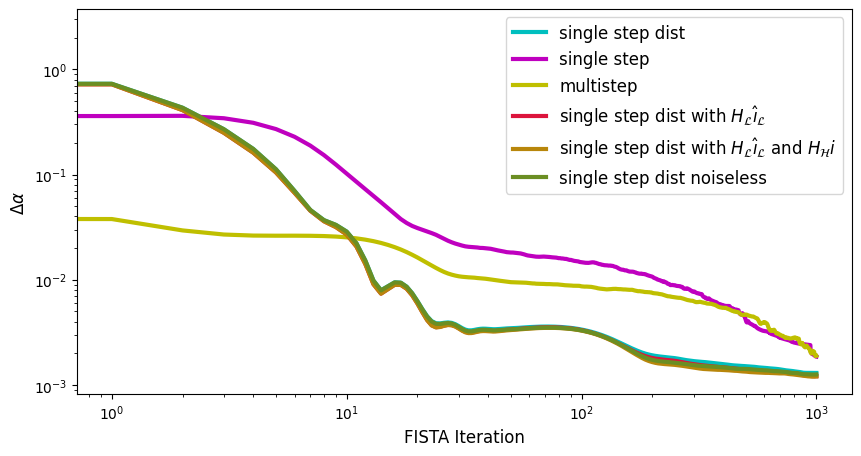

In [21]:
for i, convname in enumerate(conv_csv_names):
    difalpha = helpers.read_csv(convname)
    difalpha = difalpha[1:]
    difalpha = [float(x) for x in difalpha]
    plt.plot(range(0, len(difalpha)), difalpha, c=colours2[i], label=strats[i], lw=3)

plt.legend(loc="upper right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"$\Delta \alpha$", fontsize=12)
plt.show()

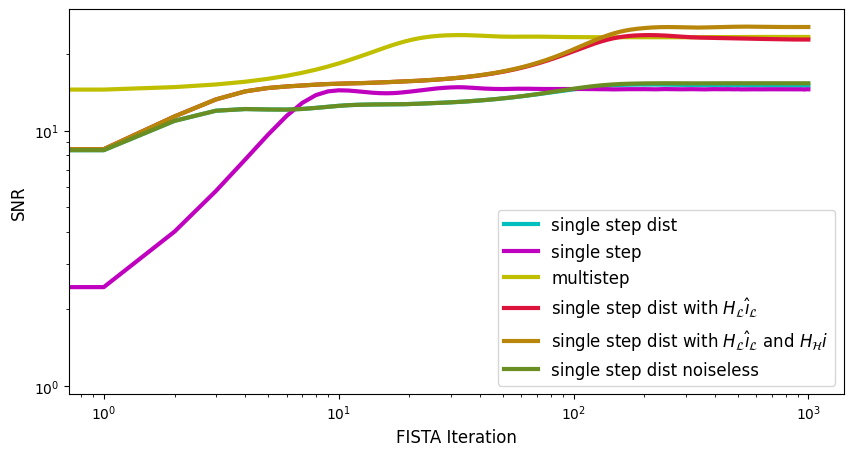

In [22]:
gt = helpers.readFits("../data/" + dataset + "_full_gt.fits")

for i, mse_name in enumerate(mse_csv_names):
    snr= helpers.read_csv(mse_name)
    snr = snr[1:]
    snr = [20 * numpy.log10(numpy.linalg.norm(gt) / numpy.sqrt(float(x))) for x in snr]
    plt.plot(range(0, len(snr)), snr, c=colours2[i], label=strats[i], lw=3)

plt.legend(loc="lower right", fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel(r"SNR", fontsize=12)
plt.show()

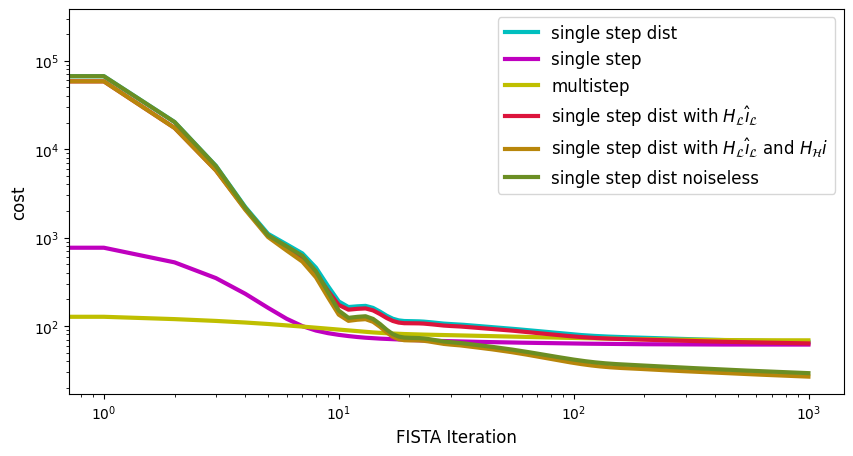

In [23]:
for i, costname in enumerate(cost_csv_names):
    costs = helpers.read_csv(costname)
    costs = costs[1:]
    costs = [float(x) for x in costs]
    plt.plot(range(0, len(costs)), costs, c=colours2[i], label=strats[i], lw=3)
    
plt.legend(loc="upper right", fontsize=12)
plt.yscale('log')
plt.xscale('log')

plt.xlabel("FISTA Iteration", fontsize=12)
plt.ylabel("cost", fontsize=12)
plt.show()

## SNR by frequency band for each case

In [24]:
bands = []
step = 2
for i in range(0, 255, step):
    bands.append((i, i + step - 1))

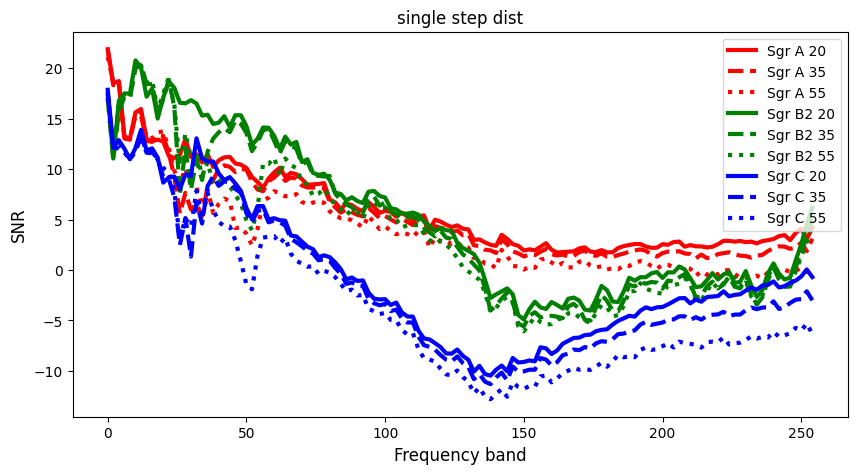

In [25]:
path = "../results/dirty_as_constraint/single_step/"
title = strats[0]

helpers.plot_snr_across_bands(title, path, cuts, bands, actual_names, colours, linestyles, labels)

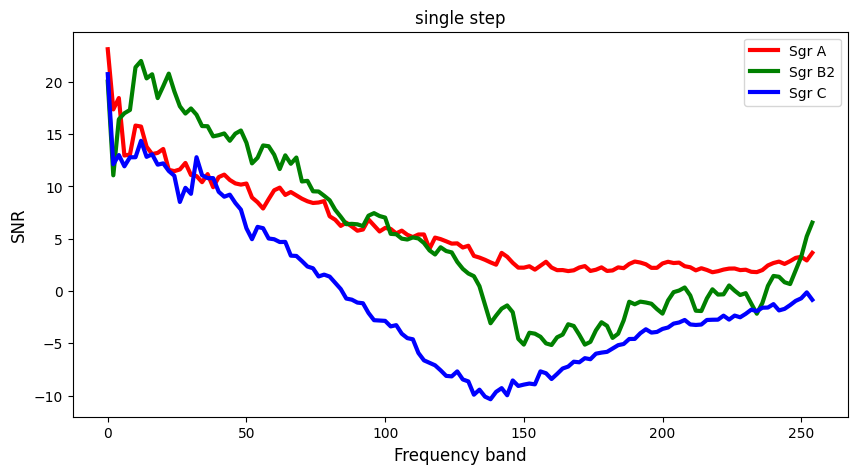

In [26]:
path = "../results/dirty_as_constraint/single_step_allvis/"
title = strats[1]

helpers.plot_snr_across_bands_allvis(title, path, bands, actual_names, colours, linestyles, labels)

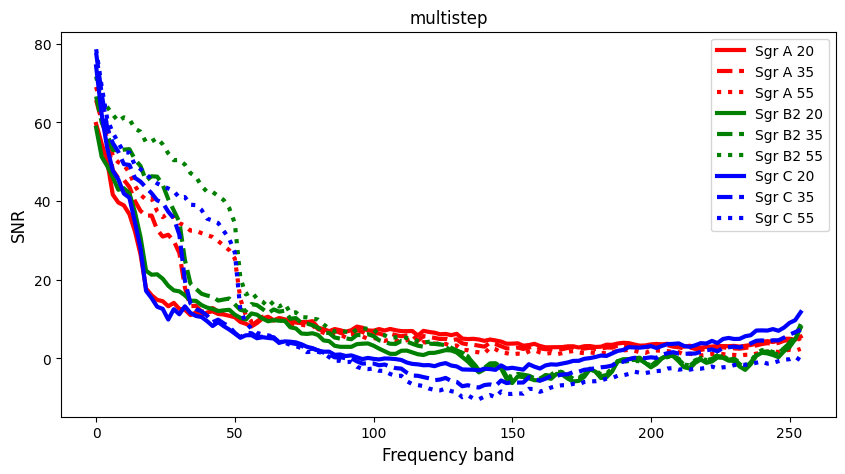

In [27]:
path = "../results/dirty_as_constraint/multistep/"
title = strats[2]

helpers.plot_snr_across_bands(title, path, cuts, bands, actual_names, colours, linestyles, labels)

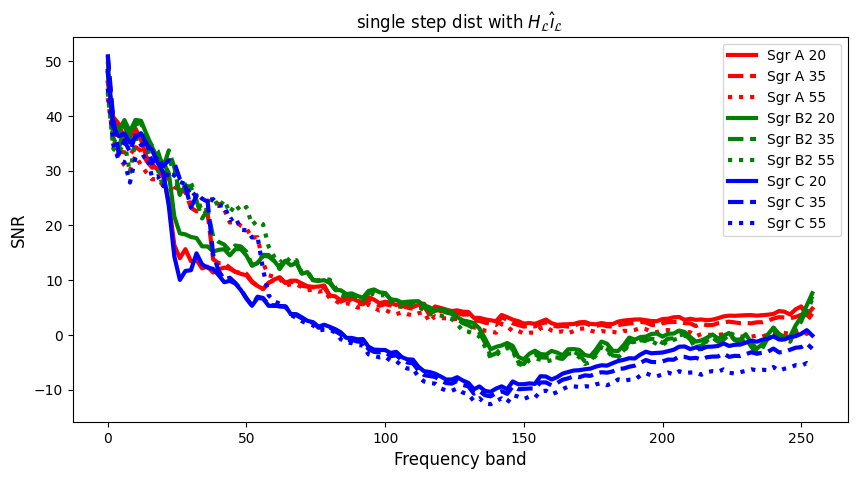

In [28]:
path = "../results/dirty_as_constraint/single_step_conv/"
title = strats[3]

helpers.plot_snr_across_bands(title, path, cuts, bands, actual_names, colours, linestyles, labels)

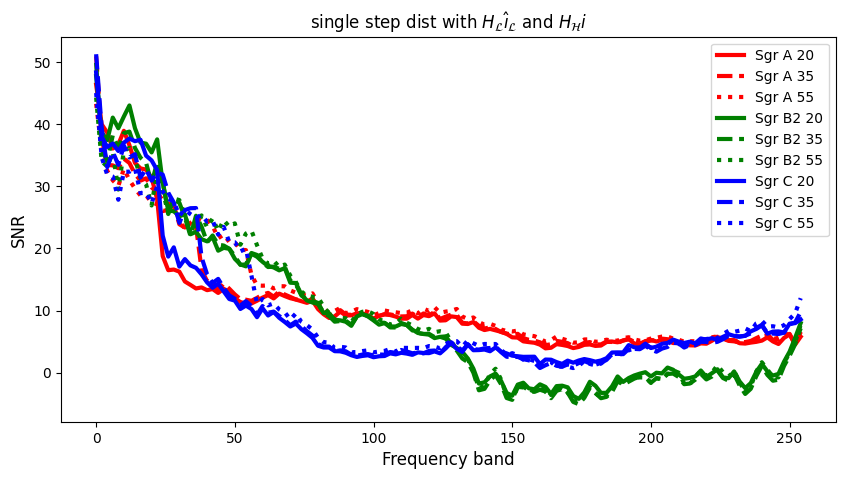

In [29]:
path = "../results/dirty_as_constraint/single_step_convlowhigh/"
title = strats[4]

helpers.plot_snr_across_bands(title, path, cuts, bands, actual_names, colours, linestyles, labels)

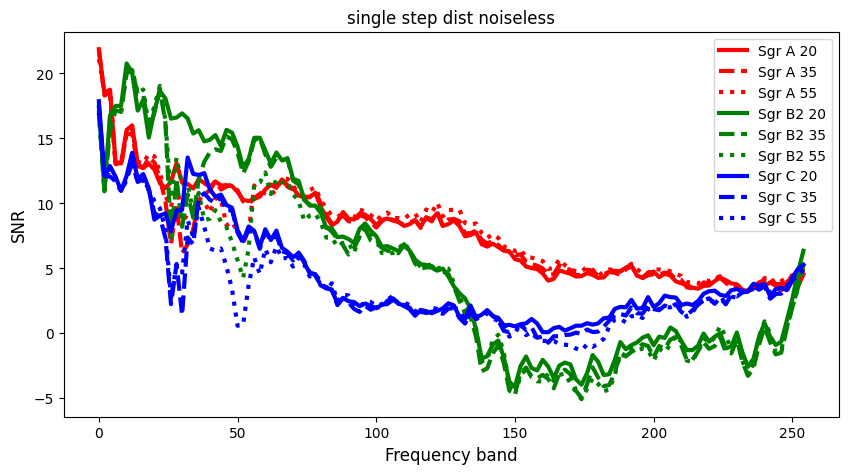

In [30]:
path = "../results/dirty_as_constraint/single_step_noiseless/"
title = strats[5]

helpers.plot_snr_across_bands(title, path, cuts, bands, actual_names, colours, linestyles, labels)

## Comparing different cases across bands

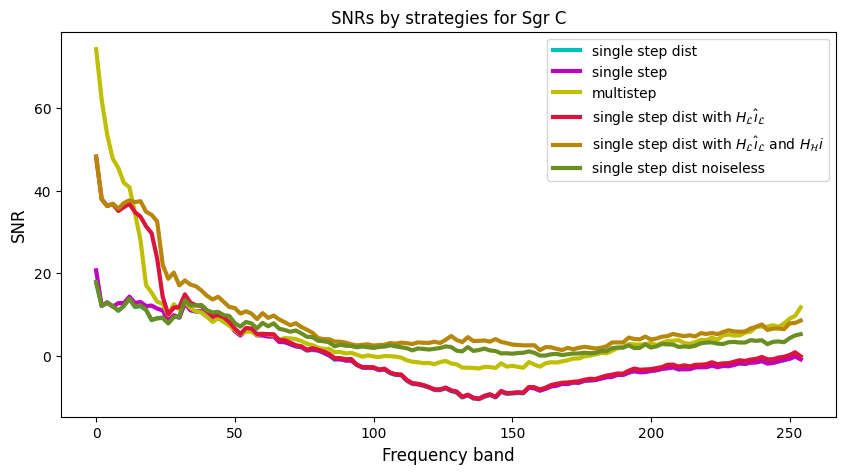

In [31]:
dataset = "SGRC"
dataset_title = "Sgr C"
cut = 20
case_paths = ["../results/dirty_as_constraint/single_step/",
    "../results/dirty_as_constraint/single_step_allvis/",
    "../results/dirty_as_constraint/multistep/",
    "../results/dirty_as_constraint/single_step_conv/",
    "../results/dirty_as_constraint/single_step_convlowhigh/",
    "../results/dirty_as_constraint/single_step_noiseless/"]

helpers.plot_snr_across_bands_and_cases(dataset, cut, dataset_title, bands, strats, case_paths, colours2)

In [32]:
print(helpers.compute_snr(helpers.readFits("../data/SGRA_full_gt.fits"), helpers.readFits("../data/SGRA_full_dirty.fits")))

-12.138846591476204
